# Visible Light Spectrum

![Visible Light](https://smd-cms.nasa.gov/wp-content/uploads/2023/04/visible_wave-jpg.webp)  

#### Source: NASA

In [57]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages")

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import time

### Audio Processing Functions

In [59]:
SAMPLE_RATE = 22050 # 1 second is divided into 22050 parts
AMPLITUDE = 4096

In [60]:
def get_wave(frequency, duration = 0.5, amplitude=AMPLITUDE):
    t = np.linspace(0, duration, int(SAMPLE_RATE*duration))
    wave = amplitude * np.sin(2* np.pi* frequency* t) # A sin(2*pi*f*t)
    return wave

In [61]:
def get_piano_notes():
    octave = ["C", "c", "D", "d", "E", "F", "f", "G", "g", "A", "a", "B"]
    base_frequency = 32.70320 # C1 - lowest C of the piano
    
    # note_freq = base_frequency * 2^(n/12)
    # For example, if we consider C (n=0) as our base note, then C# will have the frequency = base_freq * 2^(1/12)
    note_frequencies = {}
    
    note_frequencies["A0"] = 27.5 * pow(2, 0/12)
    note_frequencies["a0"] = 27.5 * pow(2, 1/12)
    note_frequencies["B0"] = 27.5 * pow(2, 2/12)
    
    i = 0
    for k in range(1,9):
        for j in range(len(octave)):
            note_frequencies[octave[j] + str(k)] = base_frequency * pow(2, i/12)
                
            if(octave[j] == "C" and k == 8):
                break
            i += 1
    
    note_frequencies[''] = 0.0 # silence
    return note_frequencies

print("Min/ Max Piano: ", get_piano_notes()["A0"], get_piano_notes()["C8"])
print("Min/ Max Violin: ", get_piano_notes()["G3"], get_piano_notes()["E7"])
print("Min/ Max Viola: ", get_piano_notes()["C3"], get_piano_notes()["C6"])
print("Min/ Max Cello: ", get_piano_notes()["C2"], get_piano_notes()["E5"])

Min/ Max Piano:  27.5 4186.0096
Min/ Max Violin:  195.99774398605402 2637.0208050510087
Min/ Max Viola:  130.8128 1046.5024
Min/ Max Cello:  65.4064 659.2552012627522


In [62]:
piano = get_piano_notes()
violin = {}
viola = {}
cello = {}

pianoList = list(get_piano_notes())

minViolin = pianoList.index("G3")
maxViolin = pianoList.index("E7")+1
minViola = pianoList.index("C3")
maxViola = pianoList.index("C6")+1
minCello = pianoList.index("C2")
maxCello = pianoList.index("E5")+1

for i in range(minViolin, maxViolin):
    violin[pianoList[i]] = get_piano_notes()[pianoList[i]]
    
for i in range(minViola, maxViola):
    viola[pianoList[i]] = get_piano_notes()[pianoList[i]]
    
for i in range(minCello, maxCello):
    cello[pianoList[i]] = get_piano_notes()[pianoList[i]]

# Converting Stellar Images to Sound

In [63]:
# Open the Image for Processing in BGR 
img = cv2.imread("Stellar Forge.jpeg", cv2.IMREAD_UNCHANGED) # cv2.imread(path, flag) default_flag = cv2.IMREAD_COLOR

# Get the HSV valus of the Image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
print(img.shape) # rows, columns, channels (BGR = 3, Greyscale = None)
print(hsv.shape)
print(img.size)

(1204, 1280, 3)
(1204, 1280, 3)
4623360


In [64]:
# Split the Images in to Blue, Green and Red Channels
yBlue = img[:, :, 0]
yGreen = img[:, :, 1]
yRed = img[:, :, 2]

H = hsv[:, :, 0]
S = hsv[:, :, 1]
V = hsv[:, :, 2]

In [65]:
# Convert the above BGR colours to their respective wavelengths followed by to their frequencies

# This conversion assumes that 0 = 400 nm (the minimum wavelength of visible light) and 255 = 780 nm (the maximum 
# wavelength of visible light)

# frequency = speed / wavelength; where speed = speed_of_light in this case

# Visible spectrum (400nm - 780nm)
# Violet: 400 - 420 nm.
# Indigo: 420 - 440 nm. =============> B of BGR = 400 -490
# Blue: 440 - 490 nm.

# Green: 490 - 570 nm.
# Yellow: 570 - 585 nm. =============> G of BGR = 490 -585

# Orange: 585 - 620 nm.
# Red: 620 - 780 nm.    =============> R of BGR = 585 -780

# RGB = 0 - 255

speed_of_light = 3* pow(10,8)

blueFrequencies = np.array([speed_of_light/ (((90* pow(10, -9)* yBlue[i])/255) + 440* pow(10, -9)) if ((300 * pow(10, -9) * yBlue[i])/255).all() != 0 
                  else np.array([0.0]*yBlue[i]) for i in range(0,len(yBlue))])

greenFrequencies = np.array([speed_of_light/ (((95* pow(10, -9)* yGreen[i])/255) + 490* pow(10, -9)) if ((300 * pow(10, -9) * yGreen[i])/255).all() != 0 
                  else np.array([0.0]*yGreen[i]) for i in range(0,len(yGreen))])

redFrequencies = np.array([speed_of_light/ (((195* pow(10, -9)* yRed[i])/ 255) + 585* pow(10, -9)) if ((300 * pow(10, -9) * yRed[i])/255).all() != 0 
                  else np.array([0.0]*yRed[i]) for i in range(0,len(yGreen))])

print(type(blueFrequencies), blueFrequencies.shape, blueFrequencies[0][0])
print(type(greenFrequencies), greenFrequencies.shape, greenFrequencies[0][0])
print(type(redFrequencies), redFrequencies.shape, redFrequencies[0][0])


<class 'numpy.ndarray'> (1204, 1280) 670523271101761.8
<class 'numpy.ndarray'> (1204, 1280) 604432505036937.4
<class 'numpy.ndarray'> (1204, 1280) 498484996579024.5


In [66]:
# Get the Minimum and Maximum Frequencies of BGR to map them to frequency range of the String Trio (Violin, Viola, Cello)

# Violin G3(196.0 Hz) E7(2637.0 Hz) : Blue
# Viola C3(130.8 Hz) C6(1046.5 Hz) : Green
# Cello C2(65.4 Hz) E5(659.3 Hz) : Red

minBlue = np.min(blueFrequencies)
maxBlue = np.max(blueFrequencies)
minGreen = np.min(greenFrequencies)
maxGreen = np.max(greenFrequencies)
minRed = np.min(redFrequencies)
maxRed = np.max(redFrequencies)

blueFrequencies = np.array([(((blueFrequencies[i] - minBlue)*(2637.0 - 196.0)) / (maxBlue - minBlue)) + 196.0 for i in range(len(blueFrequencies))])
greenFrequencies = np.array([(((greenFrequencies[i] - minGreen)*(1046.5 - 130.8)) / (maxGreen - minGreen)) + 130.8 for i in range(len(greenFrequencies))])
redFrequencies = np.array([(((redFrequencies[i] - minRed)*(659.3 - 65.4)) / (maxRed - minRed)) + 65.4 for i in range(len(redFrequencies))])

print(minBlue, maxBlue)
print(minGreen, maxGreen)   
print(minRed, maxRed)   

566037735849056.6 680181381701787.1
512820512820512.7 611779759286656.8
0.0 508170585890793.1


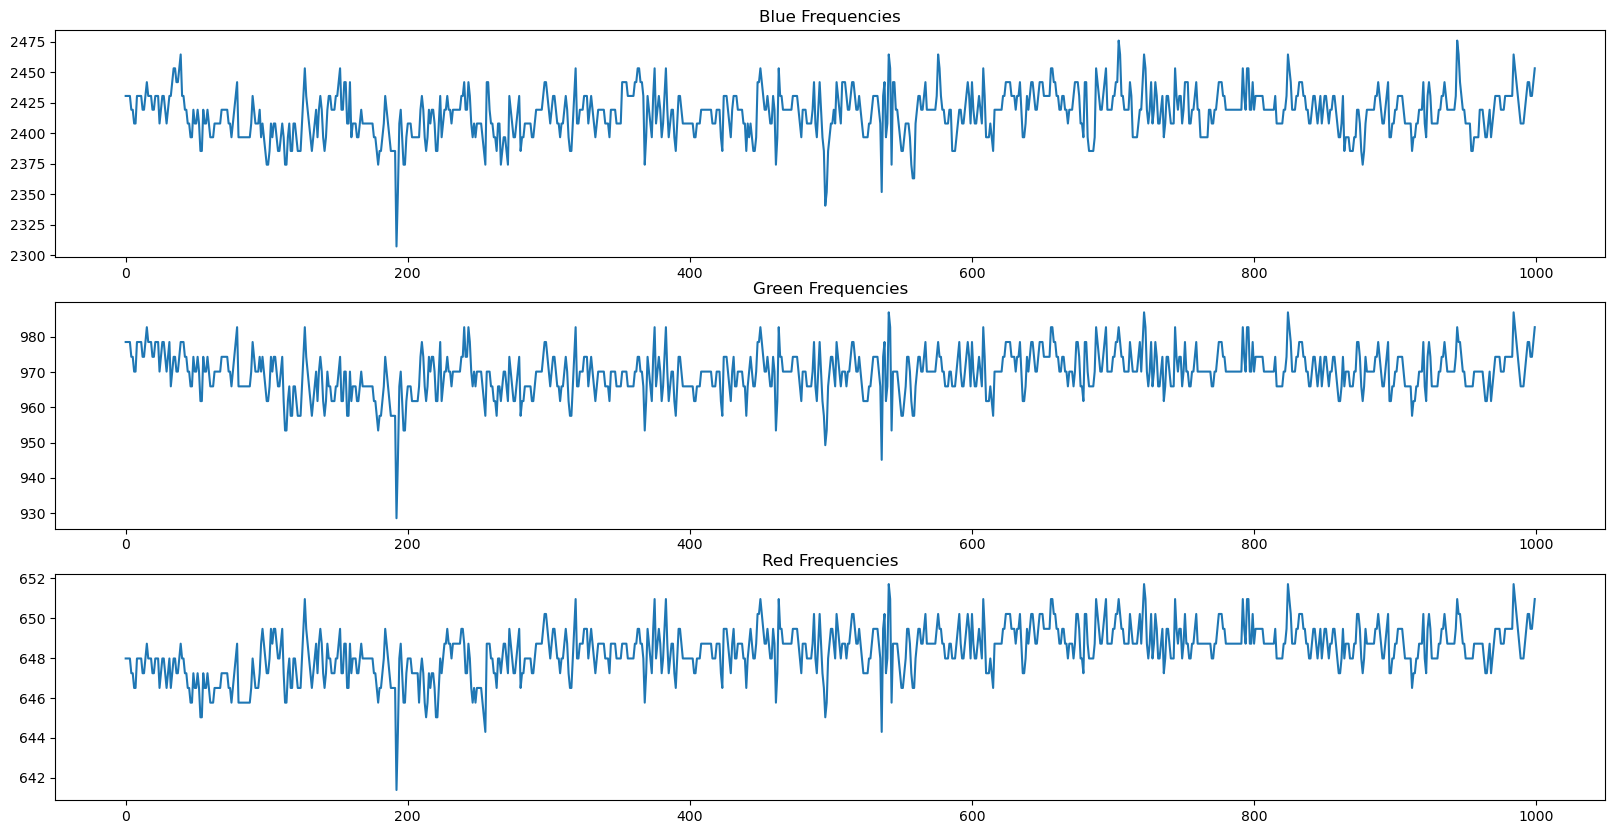

In [67]:
# Plot the Waves of the 3 Colors

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.plot(blueFrequencies[0][0:1000])
plt.subplot(3,1,1).set_title("Blue Frequencies")

plt.subplot(3,1,2)
plt.plot(greenFrequencies[0][0:1000])
plt.subplot(3,1,2).set_title("Green Frequencies")

plt.subplot(3,1,3)
plt.plot(redFrequencies[0][0:1000])
plt.subplot(3,1,3).set_title("Red Frequencies")

#plt.savefig("photo-frequencies.png")

plt.show()

In [68]:
# Match values of the BGR frequencies to the frequencies of the String Trio
# Blue = Violin (Highest Frequency)
# Green = Viola
# Red = Cello (Lowest Frequency)

# To adjust the BGR frequencies to the range of the string trio, each pixel row of the image is added and divided
# by the sum of Hue values of the given row

violinScore = []
violaScore = []
celloScore = []

for i in range(img.shape[0]):
    key1, val1 = min(violin.items(), key=lambda freq: abs(sum(blueFrequencies[i])/sum(H[i]) - freq[1]))
    key2, val2 = min(viola.items(), key=lambda freq: abs(sum(greenFrequencies[i])/sum(H[i]) - freq[1]))
    key3, val3 = min(cello.items(), key=lambda freq: abs(sum(redFrequencies[i])/sum(H[i]) - freq[1]))
    
    violinScore.append(val1)
    violaScore.append(val2)
    celloScore.append(val3)
    
print(len(violinScore),len(violaScore), len(celloScore))

1204 1204 1204


In [69]:
# The relavent sine waves are calculated
# The frequencies of the string trio are multiplied by the sum of Hues of a given row and divided by the sum of Value
# (Brightness) of the row.
# Saturation of a given row is the amplitude to a given wave

blueWave1 = []
greenWave1 = []
redWave1 = []

time = 0.03

for i in range(0, img.shape[0]):
    amplitude = sum(S[i]) * 0.1

    blueWave1.append(get_wave(violinScore[i]* sum(H[i])/ sum(V[i]), time, amplitude))
    greenWave1.append(get_wave(violaScore[i]* sum(H[i])/ sum(V[i]), time, amplitude))
    redWave1.append(get_wave(celloScore[i]* sum(H[i])/ sum(V[i]), time, amplitude)) 

# To match the dimensions of the matrices the matrices with low timings (green, red) are repeated
#greenWave1 = greenWave1*2
#redWave1 = redWave1*4

blueWave1 = np.concatenate(np.array(blueWave1))
greenWave1 = np.concatenate(np.array(greenWave1))
redWave1 = np.concatenate(np.array(redWave1))

print(blueWave1.shape)
print(greenWave1.shape)
print(redWave1.shape)

(795844,)
(795844,)
(795844,)


In [70]:
# Safety step to ensure the equality of matrices if above step does not satisfy the need
# The unmatched matrices are flooded with 0 (silence)

waves = [blueWave1, greenWave1, redWave1]
maxCols = max(wave.shape[0] for wave in waves)

blueWave1 = np.hstack((blueWave1, np.zeros(maxCols - blueWave1.shape[0])))
greenWave1 = np.hstack((greenWave1, np.zeros(maxCols - greenWave1.shape[0])))
redWave1 = np.hstack((redWave1, np.zeros(maxCols - redWave1.shape[0])))

In [71]:
# BGR waves (String Trio) are superimposed to form a combined wave
combinedWave = blueWave1 + greenWave1 + redWave1 
combinedWave = combinedWave * (16300/np.max(combinedWave)) # Adjusting the Amplitude 

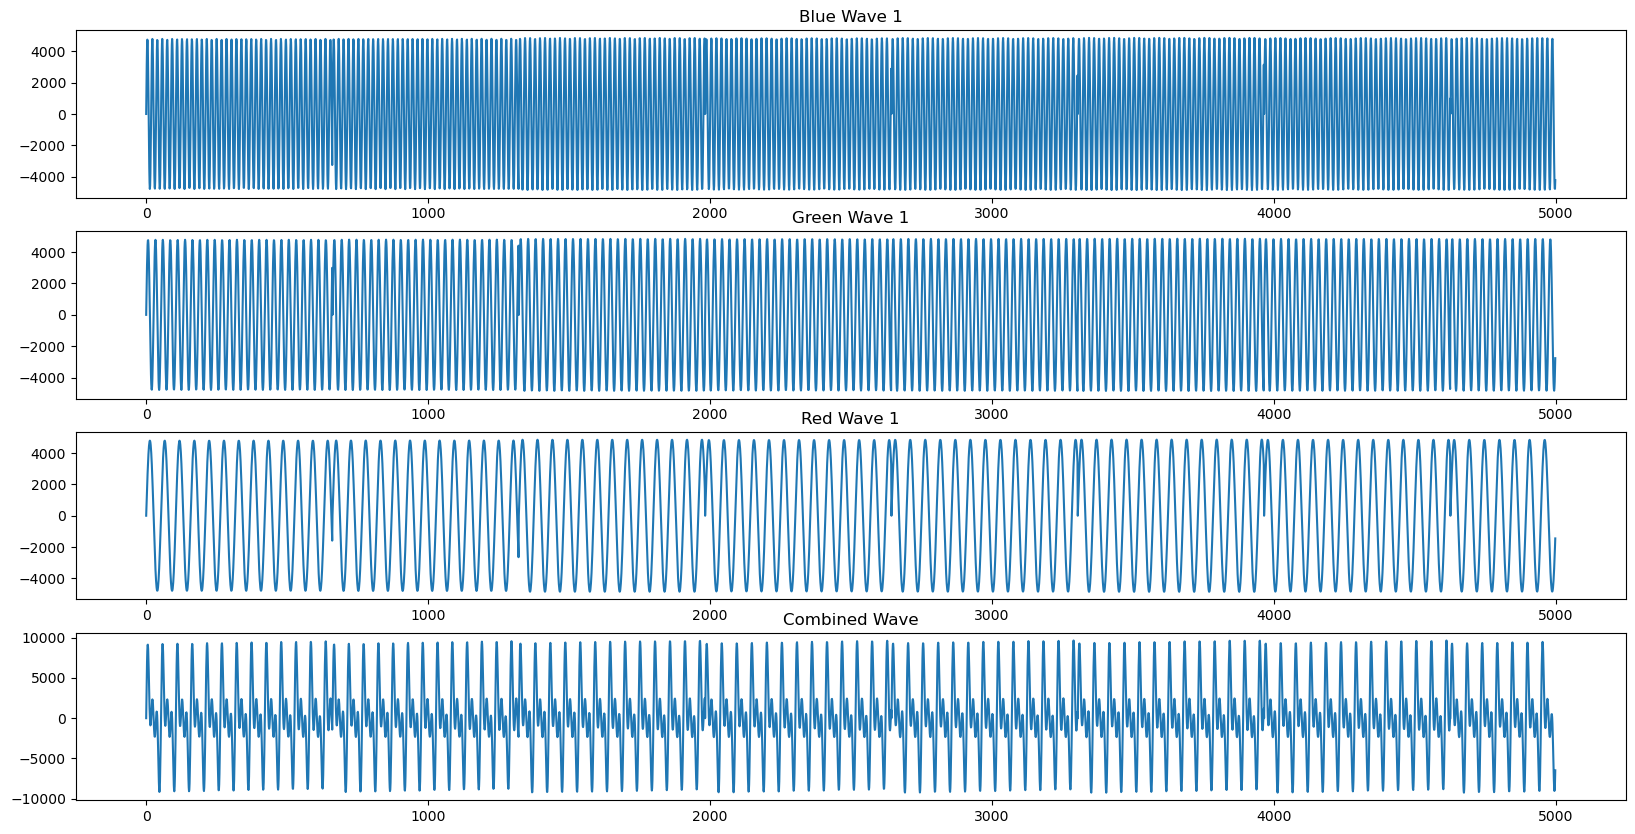

In [72]:
# Plotting the generated waves

plt.figure(figsize=(20,10))

plt.subplot(4,1,1)
plt.plot(blueWave1[0: 5000])
plt.subplot(4,1,1).set_title("Blue Wave 1")

plt.subplot(4,1,2)
plt.plot(greenWave1[0:5000])
plt.subplot(4,1,2).set_title("Green Wave 1")

plt.subplot(4,1,3)
plt.plot(redWave1[0:5000])
plt.subplot(4,1,3).set_title("Red Wave 1")

plt.subplot(4,1,4)
plt.plot(combinedWave[0:5000])
plt.subplot(4,1,4).set_title("Combined Wave")

#plt.savefig("photo-combined.png")
plt.show()

In [73]:
# The combined wave is converted to a wave file
wavfile.write('photo.mp3', SAMPLE_RATE, combinedWave.astype(np.int16))